In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Description 
train a neural network with sigmoid as activation function neurons and calculate Classification error
- classification layer should be softmax
- loss function should be cross entropy
- test with different architectures

### Model architecture
in mnist dataset, each image is 28x28 pixels, so we have 784 input features. we will use one flatten layer because flatten layer is used to flatten the input. For example, if flatten layer is applied to input of shape (batch_size, 2, 2), the output shape will be (batch_size, 4). we will use 2 hidden layers with 128 neurons and 64 neurons because if the number of neurons is too small, the model will not be able to learn the data and if the number of neurons is too large, the model will overfit the data. more hidden layers and neurons are not good and it could have negative effect on the model because it will increase the complexity of the model and it will take more time to train the model and it will also increase the chance of overfitting. we will use 10 neurons in the output layer because we have 10 classes in the dataset.

In [3]:
# Define the neural network architecture
def build_model(input_shape, num_classes, activation_function='sigmoid'):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128, activation=activation_function))
    model.add(layers.Dense(64, activation=activation_function))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [4]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [7]:
# Build the model
input_shape = (28, 28, 1)
num_classes = 10
model = build_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))


Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.6117 - accuracy: 0.8516 - val_loss: 0.2595 - val_accuracy: 0.9271
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2186 - accuracy: 0.9376 - val_loss: 0.1891 - val_accuracy: 0.9437
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1592 - accuracy: 0.9544 - val_loss: 0.1436 - val_accuracy: 0.9586
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1220 - accuracy: 0.9641 - val_loss: 0.1193 - val_accuracy: 0.9648
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0974 - accuracy: 0.9719 - val_loss: 0.1037 - val_accuracy: 0.9680
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0792 - accuracy: 0.9763 - val_loss: 0.0937 - val_accuracy: 0.9723
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0650 - accuracy: 0.9809 - val_loss: 0.0887 - val_accuracy: 0.9733
Epoch 

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9772
Test Accuracy: 97.72%
Test Loss: 0.07543829828500748


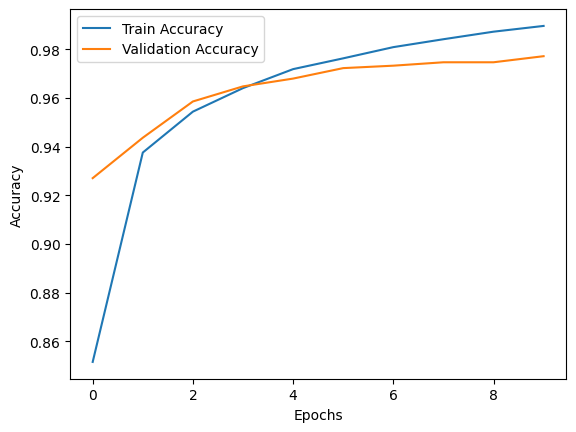

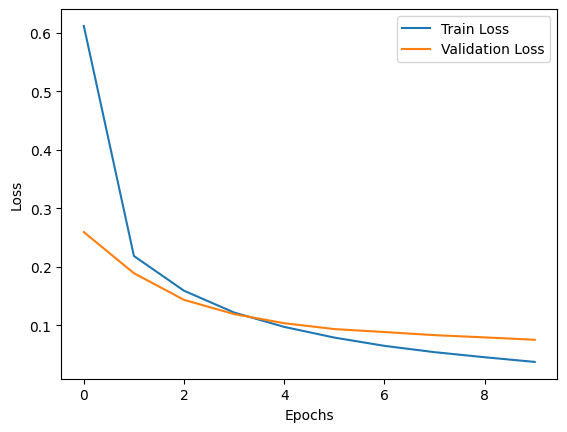

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# Optionally, you can visualize the training history

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Learning Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### now changing sigmoid activation function to relu

# Relu & Sigmoid comparison
1. **Computation:**
   - **Sigmoid:**
     - The Sigmoid activation function maps input values to a range between 0 and 1.
     - Computation involves exponentiation, which can be computationally expensive.
     - Sigmoid suffers from the vanishing gradient problem, where gradients become extremely small during backpropagation, leading to slow convergence.

   - **ReLU (Rectified Linear Unit):**
     - ReLU activation sets all negative values to zero and leaves positive values unchanged.
     - Computation is simpler compared to Sigmoid, involving a simple threshold operation.
     - ReLU tends to converge faster during training, as it doesn't suffer from the vanishing gradient problem for positive inputs.

2. **Characteristics:**
   - **Sigmoid:**
     - Output values are in the range (0, 1), which can be interpreted as probabilities.
     - It squashes input values, making it suitable for binary classification problems in the output layer.
     - Prone to vanishing gradient problem, especially in deep networks.

   - **ReLU:**
     - Output is zero for negative inputs and unchanged for positive inputs.
     - Generally provides faster convergence during training.
     - Can lead to dead neurons (neurons always outputting zero for all inputs) if not handled properly, but this is often mitigated by using variants like Leaky ReLU or Parametric ReLU.

3. **Accuracy:**
   - **Sigmoid:**
     - Effective for binary classification tasks and as an activation function in the output layer for probabilities.
     - May not perform as well in deep networks due to the vanishing gradient problem.

   - **ReLU:**
     - Generally performs well in many scenarios, especially in deep networks.
     - Can suffer from issues like dead neurons, which variants like Leaky ReLU attempt to address.

In practice, ReLU is often preferred over Sigmoid for hidden layers in deep neural networks due to its faster convergence and avoidance of the vanishing gradient problem. However, the choice can depend on the specific characteristics of the data and the nature of the problem. It's also common to use variants of ReLU (e.g., Leaky ReLU) to address some of its limitations.

In [10]:
model = build_model(input_shape, num_classes, activation_function='relu')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.2827 - accuracy: 0.9187 - val_loss: 0.1469 - val_accuracy: 0.9574
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1163 - accuracy: 0.9655 - val_loss: 0.1091 - val_accuracy: 0.9658
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0818 - accuracy: 0.9758 - val_loss: 0.0869 - val_accuracy: 0.9729
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0624 - accuracy: 0.9806 - val_loss: 0.0767 - val_accuracy: 0.9760
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0830 - val_accuracy: 0.9745
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0858 - val_accuracy: 0.9743
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0825 - val_accuracy: 0.9768
Epoch 

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9781
Test Accuracy: 97.81%
Test Loss: 0.08230356872081757


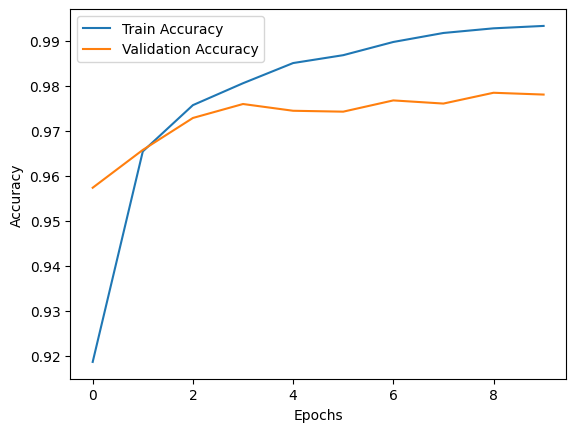

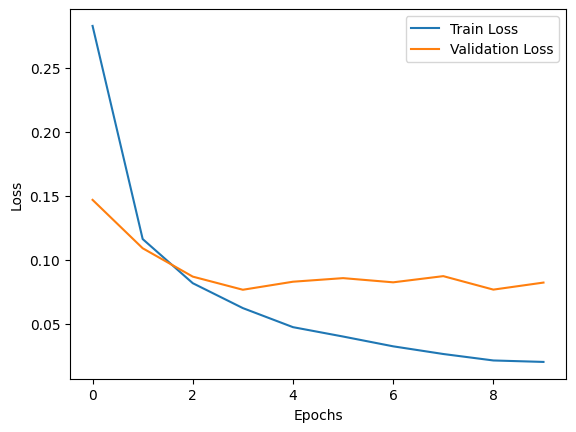

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# Optionally, you can visualize the training history

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Learning Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()